In [1]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
data = pd.read_csv("weight-height data.csv")

#quick view of dataset
print(data.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [3]:
#1 pound = 0.453592 kg 
#present weight is in pounds : converting to kg for feasibility

Weight_Kg = []
for i in range(len(data.Weight)):
    raw= (data.Weight[i])*0.453592
    Weight_Kg.append(round(raw,2))

In [4]:
#Adding new column 
data["Weight_Kg"] = Weight_Kg

#Dropping Weight(pound) column
data = data.drop(["Weight"],axis=1)

print(data.head())

  Gender     Height  Weight_Kg
0   Male  73.847017     109.72
1   Male  68.781904      73.62
2   Male  74.110105      96.50
3   Male  71.730978      99.81
4   Male  69.881796      93.60


In [5]:
print(data.shape)

#Renaming Height column
data = data.rename(columns = ({"Height": "Height_inches"}))

print(data.head())

(10000, 3)
  Gender  Height_inches  Weight_Kg
0   Male      73.847017     109.72
1   Male      68.781904      73.62
2   Male      74.110105      96.50
3   Male      71.730978      99.81
4   Male      69.881796      93.60


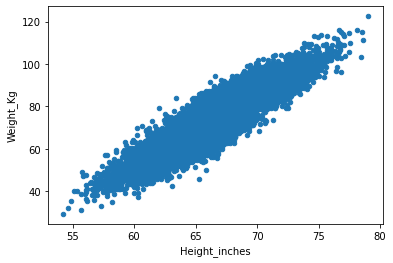

In [6]:
#relationship between weight in kg and height in inches
data.plot(kind="scatter",x="Height_inches",y="Weight_Kg");

# We can see there is surely a linear relationship that exists between Height(inches) and Weight(Kg)

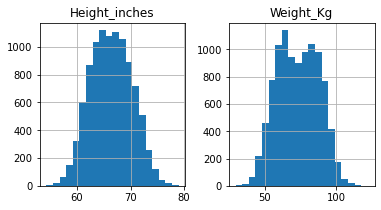

In [7]:
#distribution of height and weight

data.hist(figsize=(6,3),bins=20);

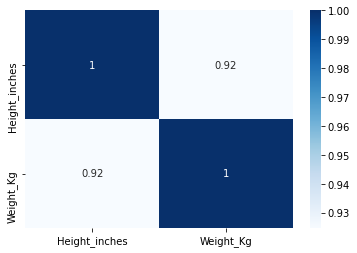

In [8]:
sns.heatmap(data.corr(),cmap=plt.cm.Blues,annot=True);

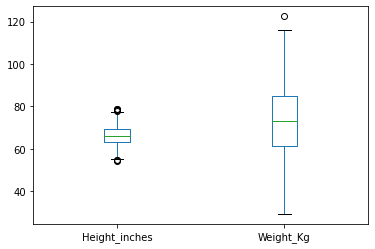

In [9]:
data.plot(kind="box");

In [10]:
#correlation coeeficients
data.corr()

,Height_inches,Weight_Kg
Height_inches,1.000000,0.924756
Weight_Kg,0.924756,1.000000


In [11]:
#changing columns to dataframe variables
Weight = pd.DataFrame(data["Weight_Kg"])
Height = pd.DataFrame(data["Height_inches"])

In [12]:
print(Weight.head())
print(Height.head())

   Weight_Kg
0     109.72
1      73.62
2      96.50
3      99.81
4      93.60
   Height_inches
0      73.847017
1      68.781904
2      74.110105
3      71.730978
4      69.881796


In [13]:
#Building of Linear Regression Model
lm= linear_model.LinearRegression()

#Building with Zero intercept
lm1 =linear_model.LinearRegression(fit_intercept=False)

#fitting of data
model = lm.fit(Height,Weight)

model1 = lm1.fit(Height,Weight)

In [14]:
#coef_ :Estimate coefficients for the linear regression
#If multiple targets are passed during the fit gives: 2D array of shape (n_targets, n_features),
#while if one target is passed, this is a 1D array of length n_features.

print(model.coef_)

print(model1.coef_)


[[3.50049926]]
[[1.11139993]]


In [15]:
print(model.intercept_)

print(model1.intercept_)   # 0 y-intercept


[-159.09153513]
0.0


In [16]:
#Evaluating the Model

print(model.score(Height,Weight))

print(model1.score(Height,Weight))

0.8551739995359381
0.4554870780879844


In [17]:
#My Linear regression model giving 85.5 % accuracy right now

#Got a very low Accuracy with '0' Y-Intercept Line

In [18]:
#What is the type of input we need to give in for prediction
type(Height)
Weight.iloc[1]

Weight_Kg    73.62
Name: 1, dtype: float64

In [19]:
#Predicting weight corresponding to Heights :

X = [60,54,71,67,70,65,55,50,85]     #considering an outlier value
X = pd.DataFrame(X)
Y = model.predict(X)

#Converting output to Dataframe
Y = pd.DataFrame(Y)
df = pd.concat([X,Y],axis=1,keys=["Sample_Height_inches","Sample_Predicted_Weight_Kg"])
print(df)

  Sample_Height_inches Sample_Predicted_Weight_Kg
                     0                          0
0                   60                  50.938421
1                   54                  29.935425
2                   71                  89.443913
3                   67                  75.441916
4                   70                  85.943413
5                   65                  68.440917
6                   55                  33.435924
7                   50                  15.933428
8                   85                 138.450902


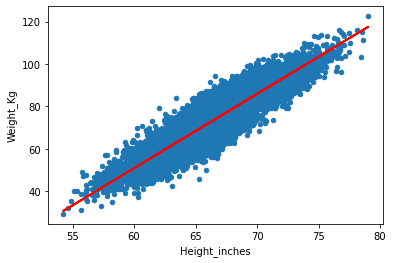

In [20]:
#Prediction using our database model
model.predict(Height)

#Visualizing the result for our database
data.plot(kind="scatter",x="Height_inches",y="Weight_Kg");
plt.plot(Height,model.predict(Height),color="red",linewidth=2);

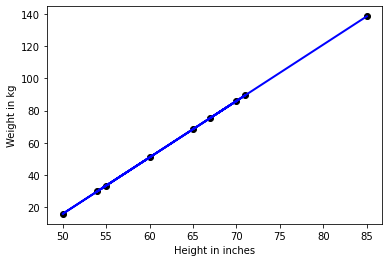

In [21]:
#Visuaizing the results for our sample data
plt.scatter(X,Y,color="black");
plt.xlabel("Height in inches")
plt.ylabel("Weight in kg")
plt.plot(X,Y,color="blue",linewidth=2);

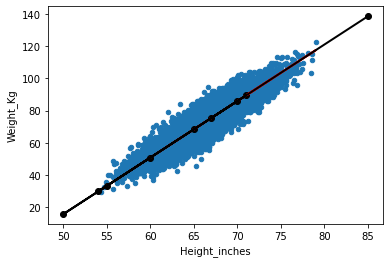

In [22]:
#Visualizing Combined Result

#Visualizing the result
data.plot(kind="scatter",x="Height_inches",y="Weight_Kg");
plt.plot(Height,model.predict(Height),color="red",linewidth=2);

#Visuaizing the results
plt.scatter(X,Y,color="black");
plt.plot(X,Y,color="black",linewidth=2);

In [23]:
print(model.score(X,Y))  #100% accuracy for our snall sample database

print(model.score(Height,Weight))    #85% Accuracy for overall database of 10,000 values

1.0
0.8551739995359381
